In [50]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
import emoji
# import itertools 
from collections import Counter
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
def rawToDf(file, key):
    '''Converts raw .txt file into a Data Frame'''
    
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r', encoding='utf-8') as raw_data:
        # print(raw_data.read())
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("group_notification")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['message'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    return df

In [7]:
df = rawToDf('whatsapp.txt', '12hr')
df

,date_time,user,message
0,2019-08-12 15:23:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2019-08-12 15:23:00,group_notification,"Vinay IPL created group ""MIT - MBA FT Academics"""
2,2019-08-12 15:23:00,group_notification,Vinay IPL added you
3,2019-08-12 15:26:00,group_notification,"Vinay IPL added Sejal, +91 97380 42112 and +91..."
4,2019-08-12 16:13:00,TDS,Any introduction here??
...,...,...,...
7379,2021-05-25 17:52:00,Shahid,Congratulations @919503089525 👏👏
7380,2021-05-25 18:31:00,Arti,Congratulations kalyani
7381,2021-05-25 20:49:00,Kalyani,Thank you everyone ☺️🥳
7382,2021-05-26 13:04:00,IPL2,https://www.linkedin.com/jobs/view/2555161007 ...


In [8]:
df.user.unique()

array(['group_notification', 'TDS', 'Ipsita', 'Vinay IPL',
       '+91 98816 67812', 'Piyush', 'Dhanashree', 'Supriya', 'Naveen',
       'Zaki', 'Shahid', 'Sushanth', 'Basu', 'Shubham', '+91 96547 32364',
       '+91 99715 00974', 'Pranit', 'Meera', 'Ninad Ipl', 'Neelima',
       'Juhi', '+91 90288 11938', 'Yash', 'Arti', 'Kalyani',
       'Supriya Patil', '+91 73372 38278', 'Komal', 'Nikhil', 'Pallavi',
       '+91 82082 32720', 'Rahul IPL', 'Souredeep', 'Vrushabh',
       '+91 83083 01031', '+91 98867 12878', '+91 74116 71299', 'Umesh',
       'Mohan', 'Guru', 'Omkar MBA', "Poonam Ma'am", '+91 99456 10428',
       "Sonali Ma'am", 'Raju Gurav MIT', '+91 98230 10005',
       '+91 80735 56748', '+91 99594 20006', '+91 80955 06555',
       '+91 88844 38555', '+91 70584 12100', 'Koustav', '+91 95911 84093',
       'IPL2', '+91 96118 23086', 'IPL Sai Sunder', 'Sejal',
       '+91 88844 46840', '+91 82900 32080', '+91 84319 67270',
       '+91 79880 12812'], dtype=object)

In [9]:
df['day'] = df['date_time'].dt.strftime('%a')
df['month'] = df['date_time'].dt.strftime('%b')
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].apply(lambda x: x.date())
df

,date_time,user,message,day,month,year,date
0,2019-08-12 15:23:00,group_notification,Messages and calls are end-to-end encrypted. N...,Mon,Aug,2019,2019-08-12
1,2019-08-12 15:23:00,group_notification,"Vinay IPL created group ""MIT - MBA FT Academics""",Mon,Aug,2019,2019-08-12
2,2019-08-12 15:23:00,group_notification,Vinay IPL added you,Mon,Aug,2019,2019-08-12
3,2019-08-12 15:26:00,group_notification,"Vinay IPL added Sejal, +91 97380 42112 and +91...",Mon,Aug,2019,2019-08-12
4,2019-08-12 16:13:00,TDS,Any introduction here??,Mon,Aug,2019,2019-08-12
...,...,...,...,...,...,...,...
7379,2021-05-25 17:52:00,Shahid,Congratulations @919503089525 👏👏,Tue,May,2021,2021-05-25
7380,2021-05-25 18:31:00,Arti,Congratulations kalyani,Tue,May,2021,2021-05-25
7381,2021-05-25 20:49:00,Kalyani,Thank you everyone ☺️🥳,Tue,May,2021,2021-05-25
7382,2021-05-26 13:04:00,IPL2,https://www.linkedin.com/jobs/view/2555161007 ...,Wed,May,2021,2021-05-26


In [11]:
new_df = df.copy()      # let's use a copy of our dataset for this analysis.
new_df['message_count'] = new_df.shape[0]*[1]      # adding extra helper column --> message_count.
new_df

,date_time,user,message,day,month,year,date,message_count
0,2019-08-12 15:23:00,group_notification,Messages and calls are end-to-end encrypted. N...,Mon,Aug,2019,2019-08-12,1
1,2019-08-12 15:23:00,group_notification,"Vinay IPL created group ""MIT - MBA FT Academics""",Mon,Aug,2019,2019-08-12,1
2,2019-08-12 15:23:00,group_notification,Vinay IPL added you,Mon,Aug,2019,2019-08-12,1
3,2019-08-12 15:26:00,group_notification,"Vinay IPL added Sejal, +91 97380 42112 and +91...",Mon,Aug,2019,2019-08-12,1
4,2019-08-12 16:13:00,TDS,Any introduction here??,Mon,Aug,2019,2019-08-12,1
...,...,...,...,...,...,...,...,...
7379,2021-05-25 17:52:00,Shahid,Congratulations @919503089525 👏👏,Tue,May,2021,2021-05-25,1
7380,2021-05-25 18:31:00,Arti,Congratulations kalyani,Tue,May,2021,2021-05-25,1
7381,2021-05-25 20:49:00,Kalyani,Thank you everyone ☺️🥳,Tue,May,2021,2021-05-25,1
7382,2021-05-26 13:04:00,IPL2,https://www.linkedin.com/jobs/view/2555161007 ...,Wed,May,2021,2021-05-26,1


In [12]:
new_df = new_df.groupby('date').sum().reset_index()  # grouping by date; since plot is of frequency of messages --> no. of messages / day.
new_df

,date,year,message_count
0,2019-08-12,38361,19
1,2019-08-13,6057,3
2,2019-08-14,38361,19
3,2019-08-15,6057,3
4,2019-08-18,38361,19
...,...,...,...
534,2021-05-22,10105,5
535,2021-05-23,12126,6
536,2021-05-24,58609,29
537,2021-05-25,30315,15


In [13]:
new_df.drop(columns='year', inplace=True)         # let's drop the year since we will need only the date and message count for our analysis
new_df

,date,message_count
0,2019-08-12,19
1,2019-08-13,3
2,2019-08-14,19
3,2019-08-15,3
4,2019-08-18,19
...,...,...
534,2021-05-22,5
535,2021-05-23,6
536,2021-05-24,29
537,2021-05-25,15


C:\Users\panik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


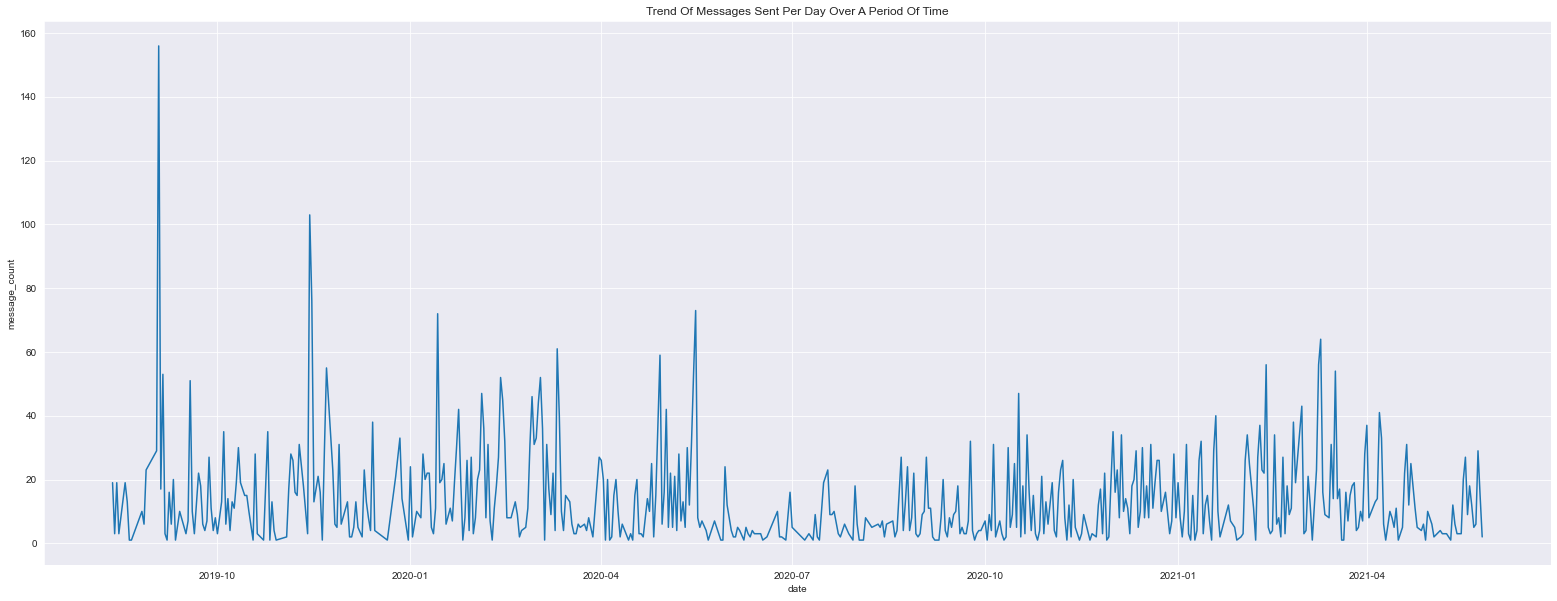

In [17]:
# Improving Default Styles using Seaborn
#sns.set_style("darkgrid")

# For better readablity;
#import matplotlib
plt.figure(figsize = (27, 10))     # Same as ``


plt.title('Trend Of Messages Sent Per Day Over A Period Of Time');
sns.lineplot(new_df.date, new_df.message_count); 

In [18]:
top10days = new_df.sort_values(by="message_count", ascending=False).head(10)    # Sort values according to the number of messages per day.
top10days.reset_index(inplace=True)           # reset index in order.
top10days.drop(columns="index", inplace=True) # dropping original indices.
top10days

,date,message_count
0,2019-09-03,156
1,2019-11-14,103
2,2019-11-15,76
3,2020-05-16,73
4,2020-01-14,72
5,2021-03-10,64
6,2020-03-11,61
7,2020-04-29,59
8,2021-02-12,56
9,2021-03-09,56


C:\Users\panik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


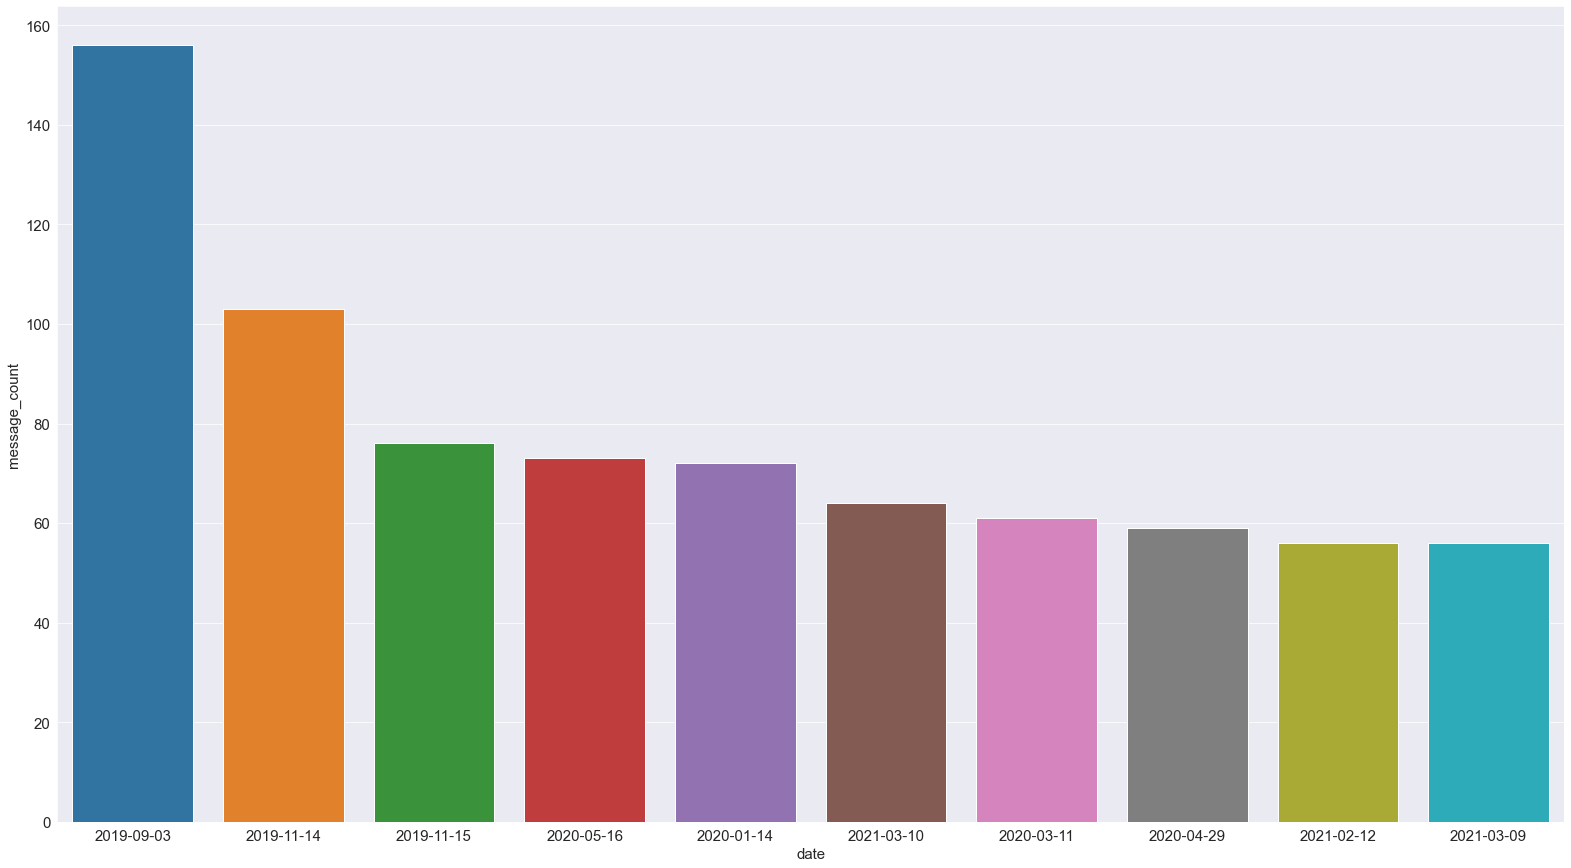

In [19]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 15
plt.figure(figsize = (27, 15)) 

# A bar plot for top 10 days
sns.barplot(top10days.date, top10days.message_count);

# Saving the plots
plt.savefig('top10_days.svg', format = 'svg')

In [20]:
df2 = df.copy()    
df2 = df2[df2.user != "group_notification"]
top10df = df2.groupby("user")["message"].count().sort_values(ascending=False)

# Final Data Frame
top10df = top10df.head(10).reset_index()
top10df

,user,message
0,IPL Sai Sunder,1084
1,Guru,903
2,Koustav,380
3,Juhi,307
4,Meera,223
5,Pallavi,222
6,IPL2,220
7,Dhanashree,215
8,+91 88844 46840,190
9,Ipsita,184


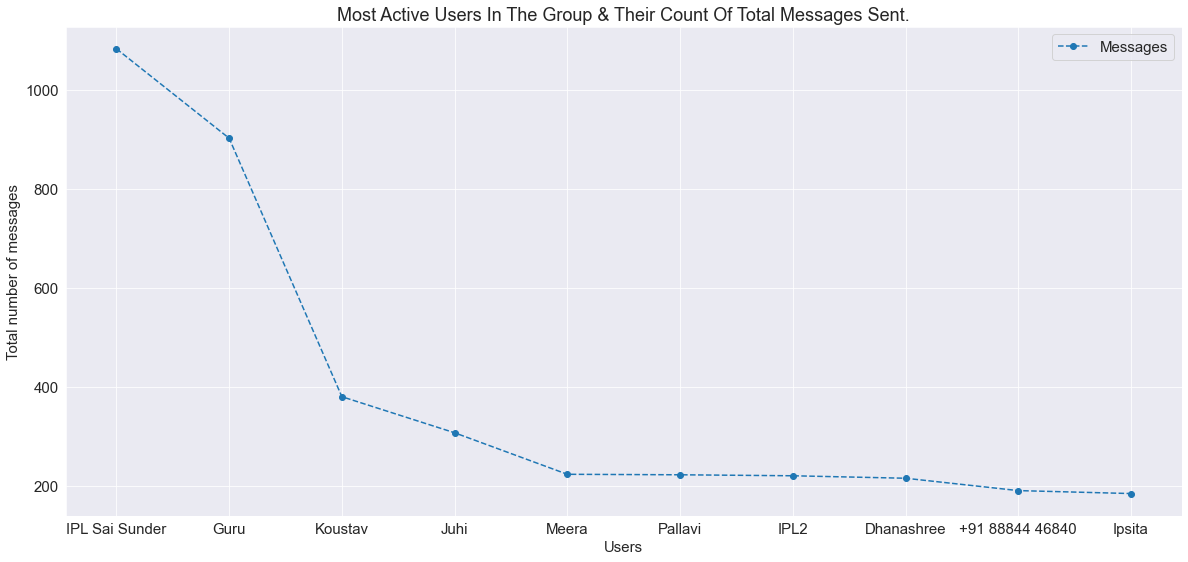

In [21]:
# Improving Default Styles using Seaborn
# sns.set_style("whitegrid")

# Increasing the figure size
matplotlib.rcParams['font.size'] = 15
plt.figure(figsize=(20, 9))

plt.plot(top10df.user, top10df.message, marker='o', ls='--')

# Labels and Title 
plt.xlabel('Users')
plt.ylabel('Total number of messages')

plt.title("Most Active Users In The Group & Their Count Of Total Messages Sent.")
plt.legend(['Messages']);

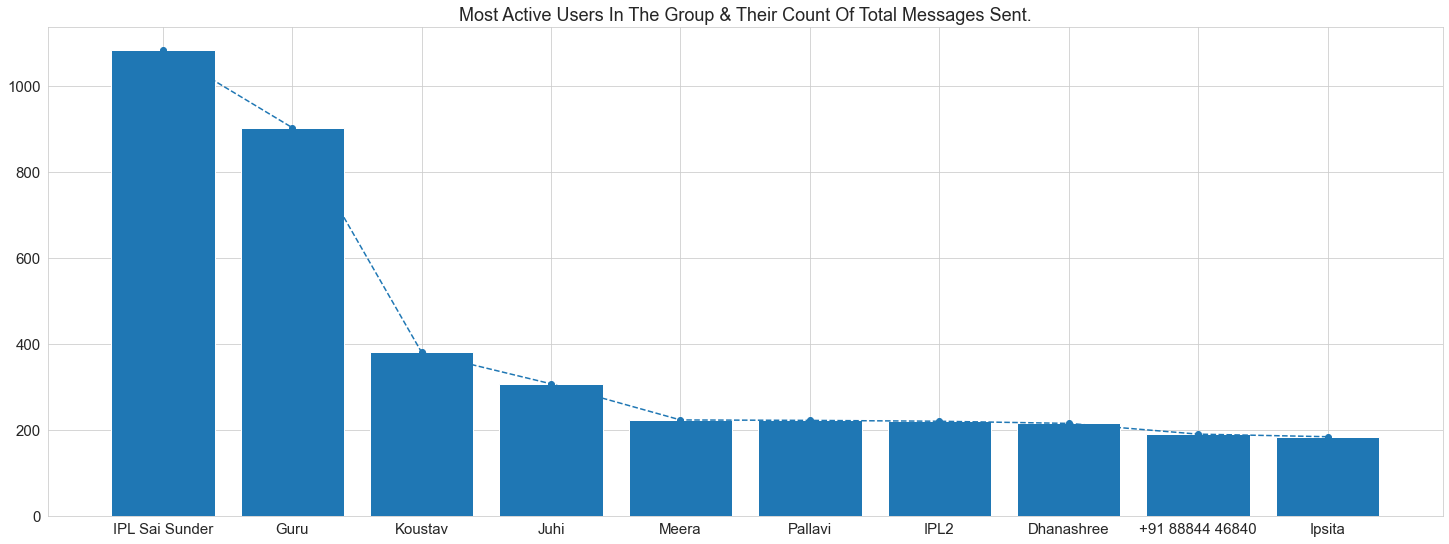

In [22]:
sns.set_style("whitegrid")

# Increasing the figure size
matplotlib.rcParams['font.size'] = 15
plt.figure(figsize=(25, 9))


plt.title("Most Active Users In The Group & Their Count Of Total Messages Sent.")

plt.bar(top10df.user, top10df.message)   # basic bar chart
plt.plot(top10df.user, top10df.message, marker='o', ls='--')  # line chart
plt.show()

In [23]:
df2 = df.copy()    
df2 = df2[df2.user != "group_notification"]
last10df = df2.groupby("user")["message"].count().sort_values(ascending=True) #either change this or use the tail function instead of head below

# Final Data Frame
last10df = last10df.head(10).reset_index() #if you did not set 'ascending=True', then use tail(10) over here instead of head(10)
last10df

,user,message
0,+91 95911 84093,1
1,Rahul IPL,1
2,+91 98230 10005,1
3,+91 79880 12812,2
4,+91 99456 10428,3
5,+91 99594 20006,3
6,Sejal,3
7,+91 84319 67270,4
8,+91 96118 23086,10
9,Sonali Ma'am,11


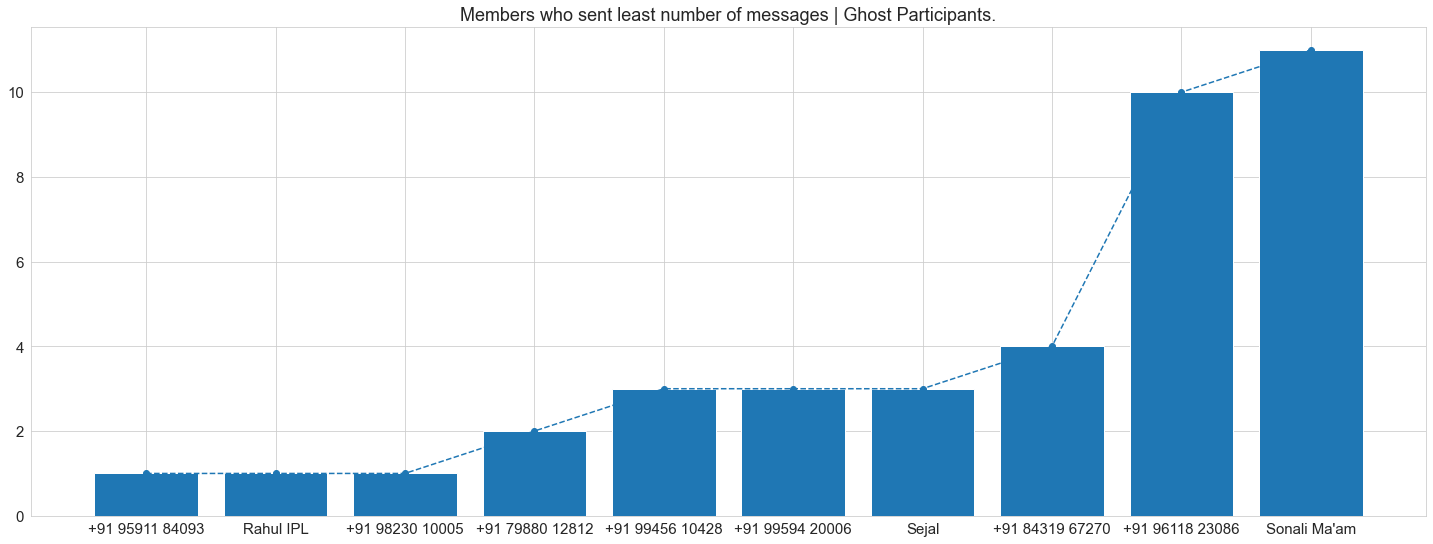

In [24]:
# Improving Default Styles using Seaborn
sns.set_style("whitegrid")

# Increasing the figure size

plt.figure(figsize=(25, 9))

plt.title("Members who sent least number of messages | Ghost Participants.")

plt.bar(last10df.user, last10df.message)   # basic bar chart
plt.plot(last10df.user, last10df.message, marker='o', ls='--')  # line chart
plt.show()

In [27]:
df[df.message == '<Media omitted> ']

,date_time,user,message,day,month,year,date
9,2019-08-12 16:23:00,Vinay IPL,<Media omitted>,Mon,Aug,2019,2019-08-12
16,2019-08-12 19:16:00,Vinay IPL,<Media omitted>,Mon,Aug,2019,2019-08-12
54,2019-08-18 20:06:00,Shubham,<Media omitted>,Sun,Aug,2019,2019-08-18
80,2019-08-26 15:25:00,Juhi,<Media omitted>,Mon,Aug,2019,2019-08-26
91,2019-08-27 17:34:00,Vinay IPL,<Media omitted>,Tue,Aug,2019,2019-08-27
...,...,...,...,...,...,...,...
6808,2021-03-28 15:41:00,Souredeep,<Media omitted>,Sun,Mar,2021,2021-03-28
6830,2021-03-31 09:30:00,IPL Sai Sunder,<Media omitted>,Wed,Mar,2021,2021-03-31
7178,2021-04-28 14:02:00,Koustav,<Media omitted>,Wed,Apr,2021,2021-04-28
7254,2021-05-17 18:50:00,IPL2,<Media omitted>,Mon,May,2021,2021-05-17


In [28]:
# Using `groupby`, `count` and `sort_values` attributes.
top10media = df[df.message == '<Media omitted> '].groupby('user').count().sort_values(by="message", ascending = False).head(10)

# Dropping unused column;
top10media.drop(columns=['date_time', 'day', 'month', 'year', 'date'], inplace=True)

# Renaming column name for visualization;
top10media.rename(columns={"message": "media_sent"}, inplace=True)

# resetting index;
top10media.reset_index(inplace=True)

top10media

,user,media_sent
0,Guru,130
1,Juhi,47
2,IPL Sai Sunder,34
3,Poonam Ma'am,20
4,Pranit,15
5,Ninad Ipl,15
6,Yash,13
7,Omkar MBA,13
8,Souredeep,12
9,+91 83083 01031,11


In [29]:
media_messages_df = df[df.message == '<Media omitted> ']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1


#PRINT ABOVE TO SEE RESULTS

l = ["IPL Sai Sunder", "Guru",'Koustav','Juhi','Meera','TDS']
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["user"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} :')
  # shape will print number of rows which indirectly means the number of messages
  print('Total Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['user'] == l[i]].shape[0]
  print('Media Messages Sent', media)

  print('---'*10)

Stats of IPL Sai Sunder :
Total Messages Sent 1050
Average Words per message 12.342857142857143
Media Messages Sent 34
------------------------------
Stats of Guru :
Total Messages Sent 773
Average Words per message 15.219922380336351
Media Messages Sent 130
------------------------------
Stats of Koustav :
Total Messages Sent 371
Average Words per message 19.07277628032345
Media Messages Sent 9
------------------------------
Stats of Juhi :
Total Messages Sent 260
Average Words per message 5.842307692307692
Media Messages Sent 47
------------------------------
Stats of Meera :
Total Messages Sent 218
Average Words per message 8.422018348623853
Media Messages Sent 5
------------------------------
Stats of TDS :
Total Messages Sent 69
Average Words per message 4.260869565217392
Media Messages Sent 9
------------------------------


In [36]:
df3 = df.copy()
df3['message_count'] = [1] * df.shape[0]    # new column that will keep count.
 
df3['hour'] = df3['date_time'].apply(lambda x: x.hour)
 
grouped_by_time = df3.groupby('hour').sum().reset_index().sort_values(by = 'hour')
grouped_by_time

,hour,year,message_count
0,0,171691,85
1,1,8079,4
2,2,12120,6
3,3,8079,4
4,4,14140,7
5,5,22219,11
6,6,44440,22
7,7,135309,67
8,8,298914,148
9,9,854461,423


C:\Users\panik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


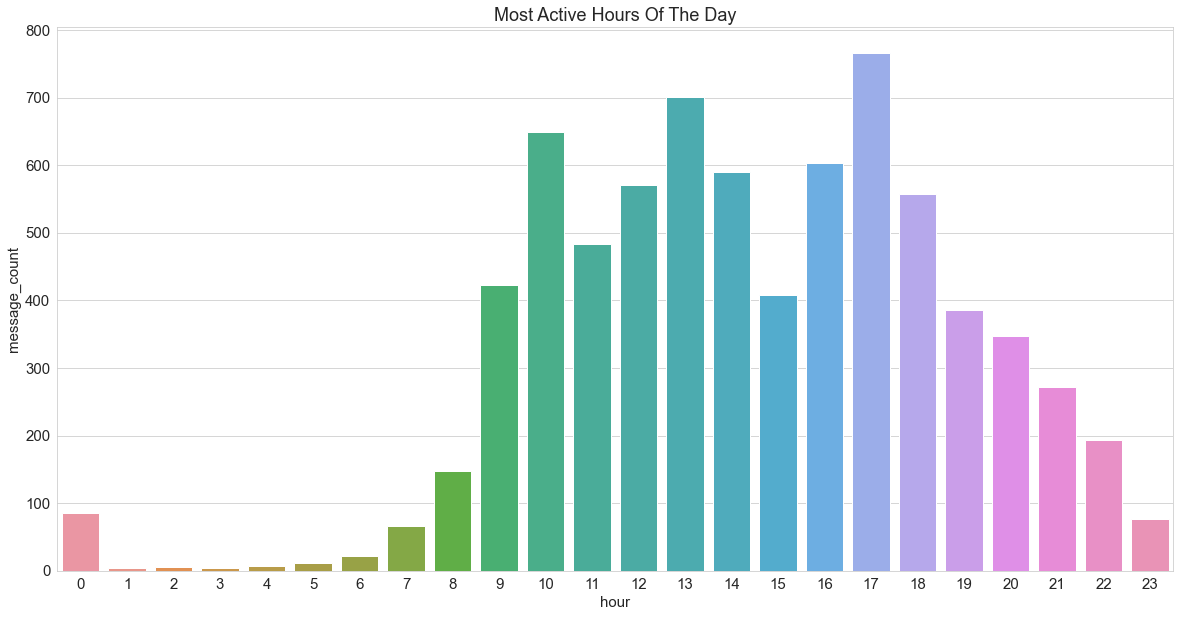

In [35]:
# Better Readablity
import matplotlib
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (20, 10)

# Beautifying Default Styles using Seaborn
#sns.set_style("whitegrid")

# PLOT: grouped by hour
sns.barplot(grouped_by_time.hour, grouped_by_time.message_count)
plt.title('Most Active Hours Of The Day');

In [41]:
# specific `order` to be printed in;
# days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# grouping by day;
grouped_by_day = df3.groupby('day').sum().reset_index()[['day', 'message_count']]
grouped_by_day

,day,message_count
0,Fri,1231
1,Mon,991
2,Sat,935
3,Sun,407
4,Thu,1264
5,Tue,1354
6,Wed,1202


C:\Users\panik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


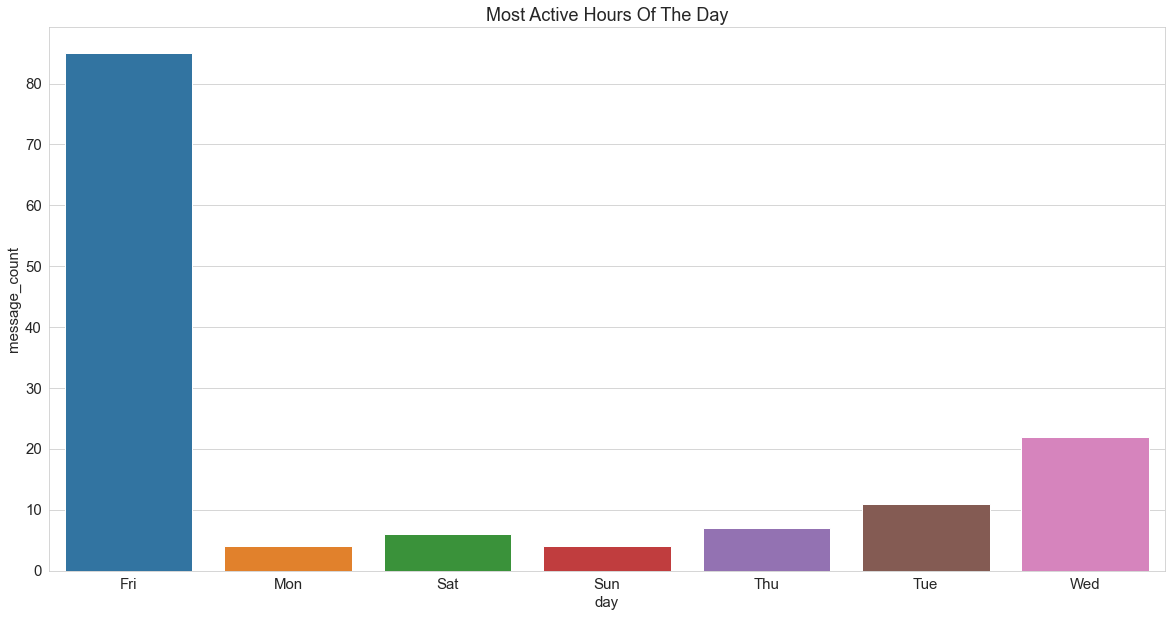

In [42]:
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (20, 10)

# Beautifying Default Styles using Seaborn
# sns.set_style("darkgrid")

# PLOT: grouped by hour
sns.barplot(grouped_by_day.day, grouped_by_time.message_count)
plt.title('Most Active Hours Of The Day');

In [43]:
# specific `order` to be printed in;
# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']   # till Sept, since chats are till Septemeber
# grouping by month;
grouped_by_month = df3.groupby('month').sum().reset_index()[['month', 'message_count']]

C:\Users\panik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


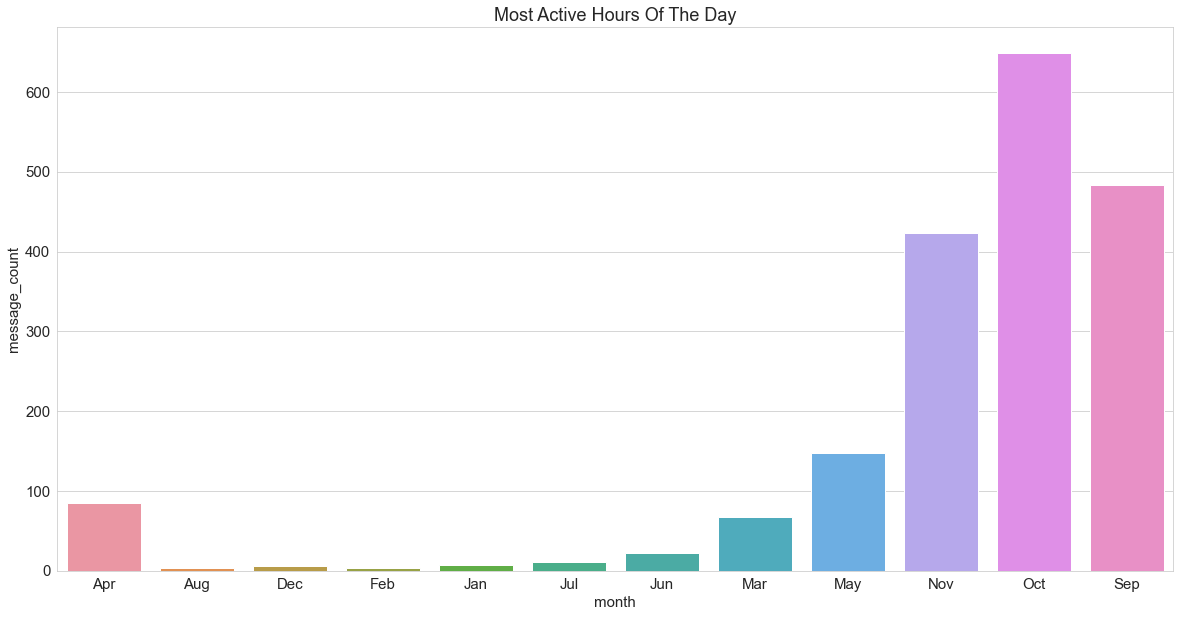

In [44]:
# Better Readablity
import matplotlib
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (20, 10)

# Beautifying Default Styles using Seaborn
# sns.set_style("darkgrid")

# PLOT: grouped by hour
sns.barplot(grouped_by_month.month, grouped_by_time.message_count)
plt.title('Most Active Hours Of The Day');

In [45]:
pip install wordcloud -q

Note: you may need to restart the kernel to use updated packages.


In [47]:
from wordcloud import WordCloud, STOPWORDS

In [49]:
pip install emoji -q

Note: you may need to restart the kernel to use updated packages.


In [51]:
comment_words = ' '

# stopwords --> Words to be avoided while forming the WordCloud,
# removed group_notifications like 'joined', 'deleted';
# removed really common words like "yeah" and "okay".
# stopwords = STOPWORDS.update(['group', 'link', 'invite', 'joined','join', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])


# iterate through the DataFrame.
for val in df3.message.values:
    
    # typecaste each val to string.
    val = str(val) 
    
    # split the value.
    tokens = val.split() 
    
    # Converts each token into lowercase.
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white',  
                min_font_size = 8).generate(comment_words)

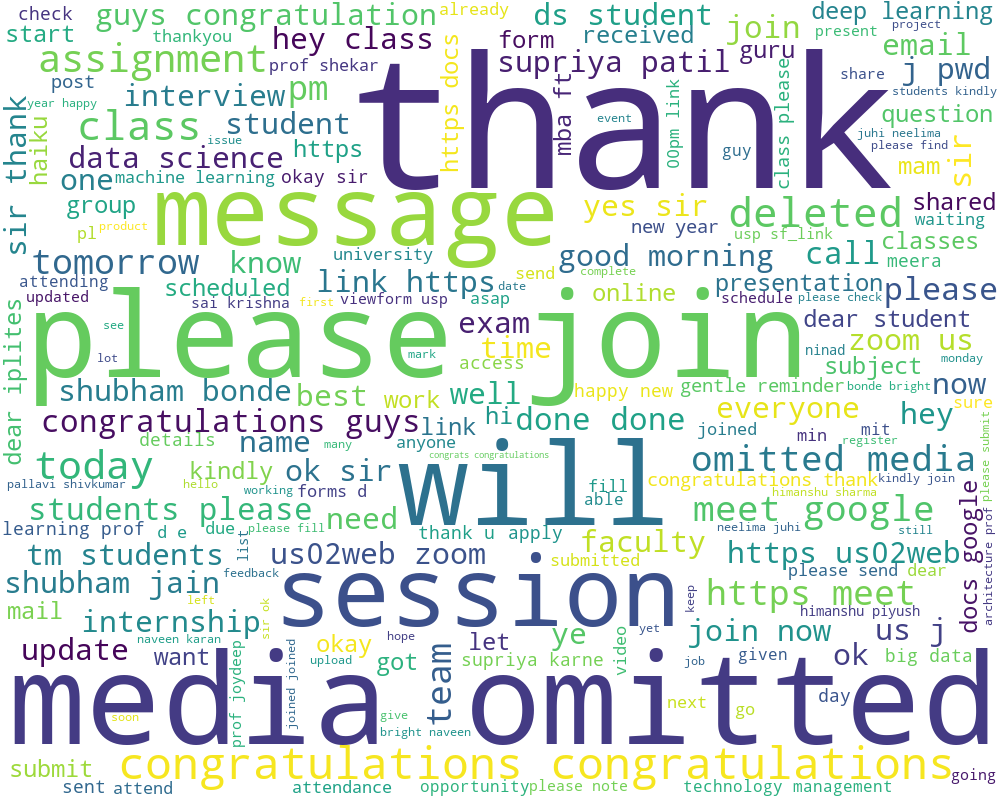

In [52]:
wordcloud.to_image()

In [53]:
df3.message

0       Messages and calls are end-to-end encrypted. N...
1       Vinay IPL created group "MIT - MBA FT Academics" 
2                                    Vinay IPL added you 
3       Vinay IPL added Sejal, +91 97380 42112 and +91...
4                                Any introduction here?? 
                              ...                        
7379                    Congratulations @919503089525 👏👏 
7380                             Congratulations kalyani 
7381                              Thank you everyone ☺️🥳 
7382    https://www.linkedin.com/jobs/view/2555161007 ...
7383    https://docs.google.com/forms/d/e/1FAIpQLSeNAr...
Name: message, Length: 7384, dtype: object